In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
ct_info_cases_df = pd.read_csv("Statistical_Analysis/data/ct_info_cases_data.csv")
ct_info_cases_df = ct_info_cases_df[['GEOID', 'income',
                                     'exposure1',
                                     'exposure2',
                                     'exposure3',
                                     'exposure4', 
                                     'estimate_cases1_density',
                                     'estimate_cases2_density',
                                     'estimate_cases3_density',
                                     'estimate_cases4_density',
                                     'change12exposure',
                                     'change23exposure',
                                     'change34exposure',
                                     'change12casedensity',
                                     'change23casedensity',
                                     'change34casedensity',       
                                     'POPULATION', 'POP_DENSITY']]
ct_info_cases_df = ct_info_cases_df.fillna(0)
ct_info_cases_df.replace(np.inf, max(ct_info_cases_df['change23casedensity']), inplace = True)
# ct_info_cases_df = ct_info_cases_df[ct_info_cases_df['GEOID'] != 17031030702]

In [309]:
AC = AgglomerativeClustering(
#     distance_threshold=0, # setting distance_threshold=0 ensures we compute the full tree.
    n_clusters=4,
    linkage='complete')

AC_model = AC.fit(ct_info_cases_df[[
#                                      'exposure1',
#                                      'exposure2',
#                                      'exposure3',
#                                      'exposure4', 
#                                      'estimate_cases1_density',
#                                      'estimate_cases2_density',
#                                      'estimate_cases3_density',
#                                      'estimate_cases4_density',
#                                      'change12exposure',
#                                      'change23exposure',
#                                      'change34exposure',
#                                      'change12casedensity',
#                                      'change23casedensity',
                                     # 'change34casedensity'
                                   ]])

In [310]:
# get labels
labels = AC_model.labels_
ct_info_cases_df['label'] = labels
ct_info_cases_df

,GEOID,income,exposure1,exposure2,exposure3,exposure4,estimate_cases1_density,estimate_cases2_density,estimate_cases3_density,estimate_cases4_density,change12exposure,change23exposure,change34exposure,change12casedensity,change23casedensity,change34casedensity,POPULATION,POP_DENSITY,label,GEOID_
0,17091011700,20571.874,0.000026,0.000072,0.000161,0.000187,0.032914,27.812121,39.726899,124.611467,1.763347,1.246768,0.160240,844.0,0.428402,2.136703,3417,7.059873,2,17091011700
1,17091011800,60197.261,0.000025,0.000069,0.000156,0.000181,0.033480,28.290446,40.410140,126.754589,1.763347,1.248960,0.159604,844.0,0.428402,2.136703,2627,5.838794,2,17091011800
2,17119400951,71223.484,0.000043,0.000072,0.000162,0.000556,0.009239,4.730215,7.982237,70.140213,0.674359,1.235345,2.441637,511.0,0.687500,7.787037,4966,3.772428,2,17119400951
3,17119400952,57223.811,0.000015,0.000025,0.000055,0.000189,0.005577,2.855567,4.818769,42.342698,0.674359,1.239736,2.440759,511.0,0.687500,7.787037,3335,2.777786,2,17119400952
4,17135957500,68961.929,0.000000,0.000000,0.000000,0.000000,0.000000,0.024403,0.027531,0.419851,0.000000,0.000000,0.000000,10.0,0.128205,14.250000,3273,0.128183,2,17135957500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,68509.474,0.000000,0.000000,0.000000,0.000000,0.000000,0.656775,0.884568,4.549209,0.000000,0.000000,0.000000,10.0,0.346835,4.142857,6712,1.022809,2,17037000100
3119,17037001500,55053.534,0.000000,0.000000,0.000000,0.000000,0.000000,0.961250,1.294645,6.658176,0.000000,0.000000,0.000000,10.0,0.346835,4.142857,3807,5.213170,2,17037001500
3120,17037000400,95704.251,0.000000,0.000000,0.000000,0.000000,0.000000,0.612820,0.825368,4.244751,0.000000,0.000000,0.000000,10.0,0.346835,4.142857,8622,0.252156,2,17037000400
3121,17037000300,81429.580,0.000000,0.000000,0.000000,0.000000,0.000000,0.091300,0.122966,0.632395,0.000000,0.000000,0.000000,10.0,0.346835,4.142857,2680,0.037200,2,17037000300


In [311]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
illinois_shp = illinois_shp.loc[:,('GEOID','geometry')]
illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
# illinois_shp = pd.DataFrame(illinois_shp)
illinois_shp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,GEOID,geometry,centroid
0,17091011700,"POLYGON ((-87.88768 41.13594, -87.88764 41.136...",POINT (-87.87355 41.12949)
1,17091011800,"POLYGON ((-87.89410 41.14388, -87.89400 41.143...",POINT (-87.87646 41.13978)
2,17119400951,"POLYGON ((-90.11192 38.70281, -90.11128 38.703...",POINT (-90.09829 38.72763)
3,17119400952,"POLYGON ((-90.09442 38.72031, -90.09360 38.720...",POINT (-90.08180 38.72984)
4,17135957500,"POLYGON ((-89.70369 39.34803, -89.69928 39.348...",POINT (-89.60390 39.38915)
...,...,...,...
3118,17037000100,"POLYGON ((-88.73488 42.10620, -88.73483 42.106...",POINT (-88.65253 42.10661)
3119,17037001500,"POLYGON ((-88.78378 41.84907, -88.77716 41.860...",POINT (-88.73721 41.88417)
3120,17037000400,"POLYGON ((-88.78353 42.06425, -88.78350 42.064...",POINT (-88.68023 42.02216)
3121,17037000300,"POLYGON ((-88.94215 42.06505, -88.94211 42.065...",POINT (-88.86924 41.96281)


In [312]:
# add label info on illinois_shp by joining ct_info_cases_df with illinois_shp
ct_info_cases_df['GEOID_']='1'
for i in range(ct_info_cases_df.shape[0]):    
    ct_info_cases_df['GEOID_'][i] = str(ct_info_cases_df['GEOID'][i])
# ct_info_cases_df = ct_info_cases_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

type(ct_info_cases_df['GEOID_'][0])

illinois_shp = pd.merge(illinois_shp, ct_info_cases_df, how='left', left_on="GEOID", right_on = "GEOID_")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [313]:
def drawCluster(col):
    cluster_map = illinois_shp.plot(
        column = col,
#         cmap = 'Reds',
        edgecolor = 'black',
        linewidth = 0.5,
        alpha = 0.9, 
#         legend = True,
        figsize = (100,100),
                     )
    cluster_map.axis('off')

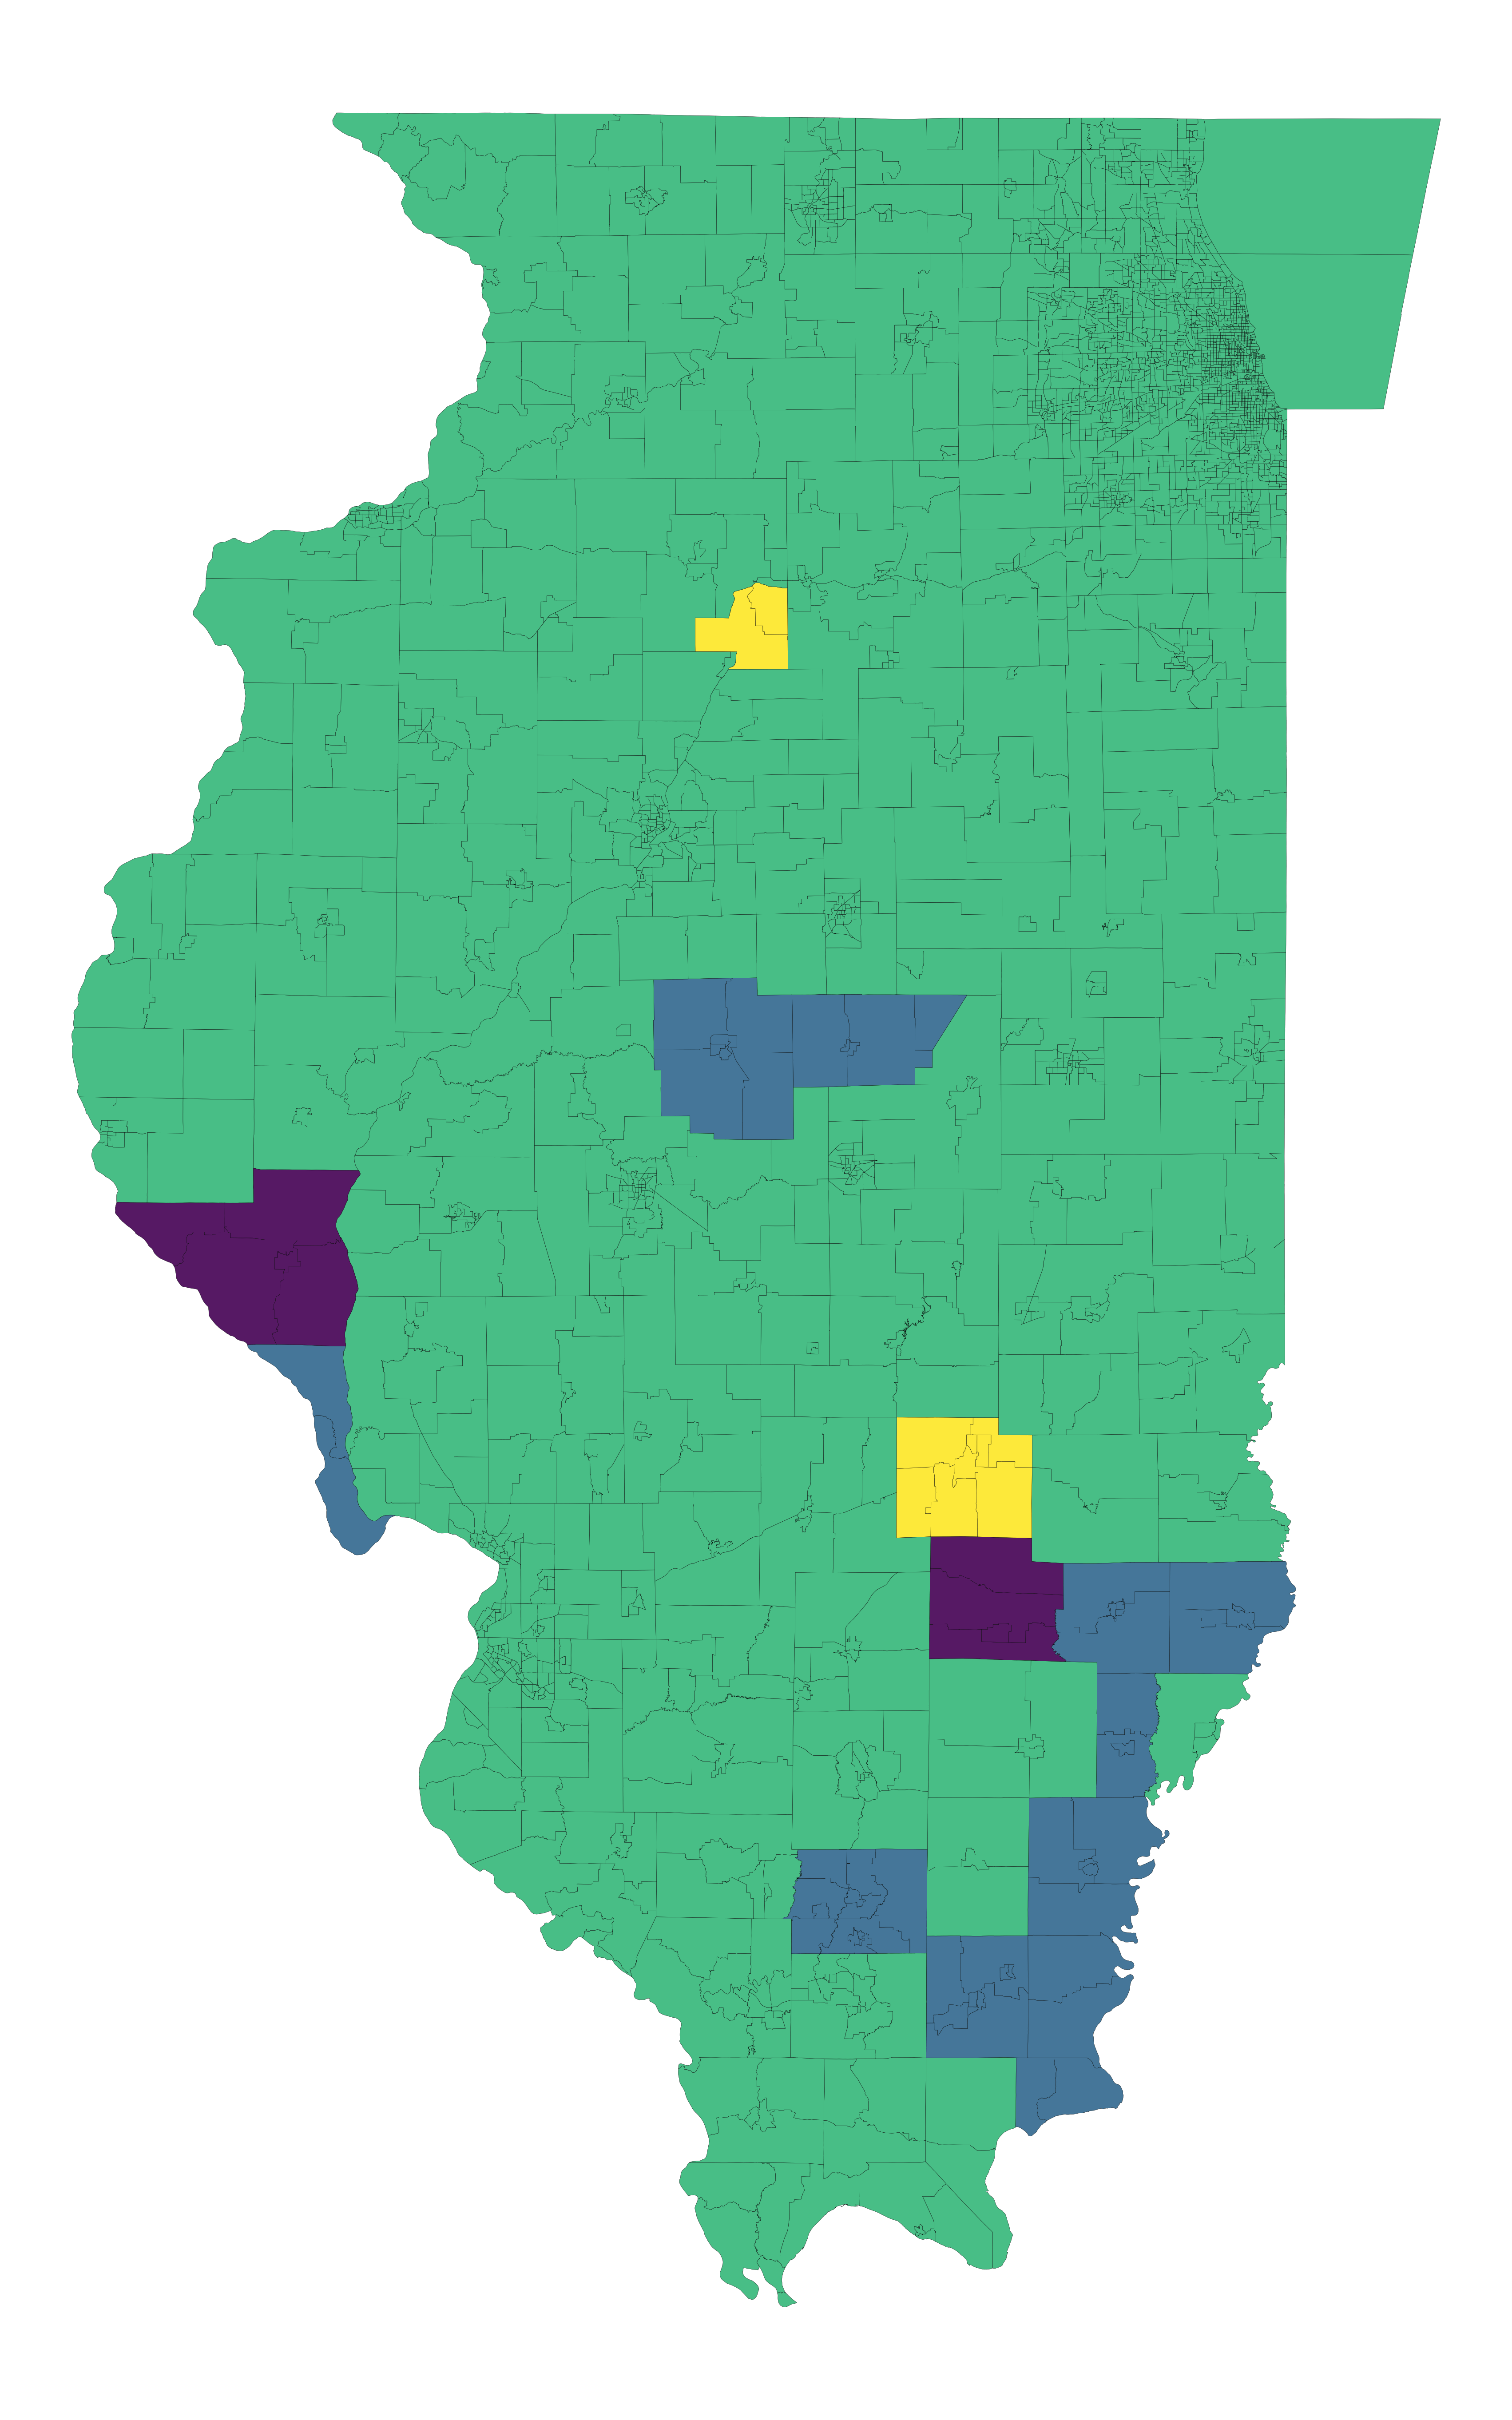

In [314]:
drawCluster(col = "label")

In [318]:
df_means = pd.DataFrame(columns=['income', 
                                 'exposure1', 'exposure2', 'exposure3', 'exposure4',
                                 'estimate_cases1_density', 'estimate_cases2_density',
                                 'estimate_cases3_density', 'estimate_cases4_density',
                                 'change12casedensity','change23casedensity','change34casedensity',
                                 'POPULATION', 'POP_DENSITY', 'label'])
# # for cluster in labels.uniuqe():

for num in range(4):
    income = np.mean(ct_info_cases_df.iloc[labels == num]['income'])
    exposure1 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure1'])
    exposure2 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure2'])
    exposure3 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure3'])
    exposure4 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure4'])
    estimate_cases1_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases2_density'])
    estimate_cases2_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases2_density'])
    estimate_cases3_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases3_density'])
    estimate_cases4_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases4_density'])
    
    change12casedensity = np.mean(ct_info_cases_df.iloc[labels == num]['change12casedensity'])
    change23casedensity = np.mean(ct_info_cases_df.iloc[labels == num]['change23casedensity'])
    change34casedensity = np.mean(ct_info_cases_df.iloc[labels == num]['change34casedensity'])
    
    POPULATION = np.mean(ct_info_cases_df.iloc[labels == num]['POPULATION'])
    POP_DENSITY = np.mean(ct_info_cases_df.iloc[labels == num]['POP_DENSITY'])
    label = np.mean(ct_info_cases_df.iloc[labels == num]['label'])
    df_means.append([income, POPULATION, POP_DENSITY,
                     exposure1, exposure2, exposure3, exposure4,
                     estimate_cases1_density, estimate_cases2_density, 
                     estimate_cases3_density, estimate_cases4_density,
                     label])

    new_row = pd.DataFrame({'income':[income], 'POP_DENSITY':[POP_DENSITY], 'POPULATION':[POPULATION],
                            'exposure1':[exposure1], 'exposure2':[exposure2], 'exposure3':[exposure3], 'exposure4':[exposure4],
                        'estimate_cases1_density':[estimate_cases1_density], 'estimate_case2_density':[estimate_cases2_density],
                            'estimate_cases3_density':[estimate_cases3_density], 'estimate_cases4_density':[estimate_cases4_density],
                        'label':[label]})
    df_means = df_means.append(new_row)
df_means

,income,exposure1,exposure2,exposure3,exposure4,estimate_cases1_density,estimate_cases2_density,estimate_cases3_density,estimate_cases4_density,change12casedensity,change23casedensity,change34casedensity,POPULATION,POP_DENSITY,label,estimate_case2_density
0,55907.066000,0.000000,0.000000,0.000000,0.0000,0.010289,NaN,0.013485,2.575400,NaN,NaN,NaN,3360.555556,0.395416,0.0,0.010289
0,57717.683000,0.000000,0.000000,0.000000,0.0000,0.115054,NaN,0.156956,10.181936,NaN,NaN,NaN,3117.068966,1.352302,1.0,0.115054
0,73677.447638,0.000359,0.000231,0.000412,0.0004,91.148776,NaN,107.188262,249.107446,NaN,NaN,NaN,4129.792843,13.285687,2.0,91.148776
0,65077.737400,0.000000,0.000000,0.000000,0.0000,0.030326,NaN,0.054350,6.531405,NaN,NaN,NaN,4024.800000,0.871374,3.0,0.030326
